In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [2]:
df = pd.read_json('../data/json/final_gensim_database_LDAMallet.json')
df.head()

,Dominant_Topics,Perc_Contributions,Topic_Keywords_List,abstracts,citations,email,faculty_name,google_scholar_link,h_index,indices,...,paper_titles,phone,prof_id,rank,rating,research_areas,score,tags,title,university_name
0,"[5, 3, 11, 10, 6, 4, 0, 9, 2, 7, 1, 8]","[56.13, 20.64, 7.52, 4.84, 3.49, 2.14, 2.14, 0...","[pore, rock, permeability, measurements, prope...",Clastic rocks with variable grain sizes exhi...,"{'All': '5218', 'Since 2013': '2863', '1995': ...",cverdin@austin.utexas.edu,Carlos Torres-Verdin,https://scholar.google.com/citations?user=I-J9...,34,"{'h-index': {'All': '34', 'Since 2013': '23'},...",...,INTERPRETATION OF BOREHOLE SONIC MEASUREMENTS...,"(512) 471-4216, (512) 471-3161",0,1,3.1,"[Static and Dynamic Formation Evaluation, Bore...",4.7,"[ Amazing lectures (3), BEWARE OF POP QUIZZES...",Professor,University of Texas--Austin (Cockrell)
1,"[7, 3, 5, 11, 9, 1, 8, 4, 0, 6, 10, 2]","[52.41, 14.85, 12.14, 4.67, 3.16, 2.68, 2.45, ...","[recovery, surfactant, foam, water, permeabili...",This paper presents an alternative method of ...,"{'All': '3308', 'Since 2013': '1489', '1992': ...",dicarlo@mail.utexas.edu,David DiCarlo,https://scholar.google.com/citations?user=OFIv...,30,"{'h-index': {'All': '30', 'Since 2013': '21'},...",...,Replicating carbonaceous vug in synthetic por...,(512) 471-1283,1,1,3.5,"[Chemical EOR, Gas Enhanced Oil Recovery, Geol...",4.7,"[ Tough Grader (2), TEST HEAVY (1), LOTS OF ...",Associate Professor,University of Texas--Austin (Cockrell)
10,"[7, 8, 11, 3, 5, 1, 0, 9, 10, 6, 2, 4]","[72.1, 8.76, 6.97, 6.53, 2.04, 1.15, 0.67, 0.6...","[recovery, surfactant, foam, water, permeabili...",Numerous studies based on static imbibition e...,"{'All': '5930', 'Since 2013': '3336', '1986': ...",mohanty@mail.utexas.edu,Kishore Mohanty,https://scholar.google.com/citations?user=Eocb...,43,"{'h-index': {'All': '43', 'Since 2013': '32'},...",...,Dynamic surfactant-aided imbibition in fractu...,(512) 471-3077,10,1,,"[Chemical EOR, Gas Enhanced Oil Recovery, Hydr...",4.7,[],Professor,University of Texas--Austin (Cockrell)
11,"[3, 7, 0, 10, 2, 1, 6, 11, 5, 4, 9, 8]","[33.5, 18.19, 15.36, 14.06, 6.95, 4.19, 3.22, ...","[data, model, pressure, reservoir, flow, metho...",Several tools and techniques exist to underst...,"{'All': '13066', 'Since 2013': '5639', '1986':...",larry_lake@mail.utexas.edu,Larry Lake,https://scholar.google.com/citations?user=eGlU...,58,"{'h-index': {'All': '58', 'Since 2013': '34'},...",...,Extension of Capacitance/Resistance Model to ...,"(512) 471-8233, (512) 471-3161",11,1,2.4,[Fundamental Processes; Integrated Reservoir C...,4.7,"[ ACCESSIBLE OUTSIDE CLASS (1), Inspirational...",Professor,University of Texas--Austin (Cockrell)
12,"[6, 7, 3, 10, 11, 0, 4, 5, 9, 8, 2, 1]","[39.13, 14.86, 13.44, 12.92, 10.95, 4.47, 1.1,...","[flow, numerical, method, model, simulation, m...","In this paper, we propose an enriched Galerk...","{'All': '19220', 'Since 2013': '7838', '1982':...",mfw@ices.utexas.edu,Mary Wheeler,https://scholar.google.com/citations?user=sX58...,66,"{'h-index': {'All': '66', 'Since 2013': '45'},...",...,Mixed Formulation of a Linearized Lubrication...,(512) 475-8625,12,1,,"[Drilling, Well Completions, and Rock Mechanic...",4.7,[],Professor,University of Texas--Austin (Cockrell)


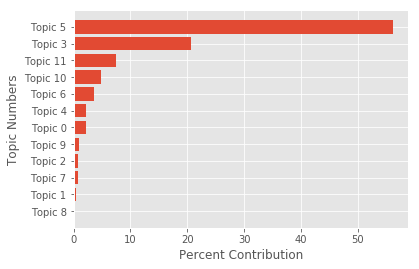

In [3]:
fig, ax = plt.subplots()

# Example data
perc_contributions = df["Perc_Contributions"][0]
topic_num = pd.Series('Topic ' + str(num) for num in df["Dominant_Topics"][0])
ax.barh(topic_num, perc_contributions, align='center')
ax.set_yticks(topic_num)
ax.set_yticklabels(topic_num)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percent Contribution')
ax.set_ylabel('Topic Numbers')
plt.show()

In [4]:
x = df.iloc[0]["Perc_Contributions"]
y = df.iloc[0]["Dominant_Topics"]

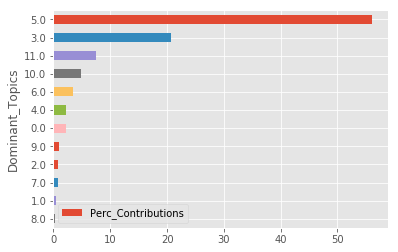

In [5]:
df1 = df.iloc[0].loc[["Perc_Contributions", "Dominant_Topics"]].apply(pd.Series).T
ax = df1.plot(y="Perc_Contributions", x="Dominant_Topics", kind='barh')
ax.invert_yaxis()  # labels read top-to-bottom

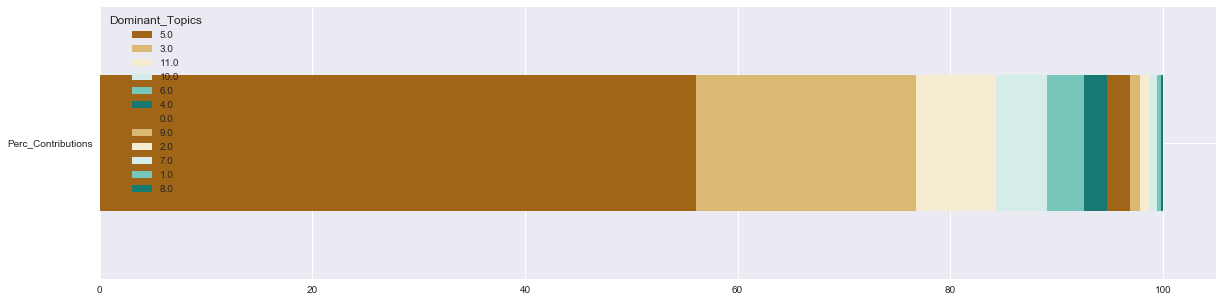

In [6]:
import seaborn as sns
sns.set(palette='BrBG')
ax = df1.set_index('Dominant_Topics').T.plot(kind='barh', stacked=True, figsize=(20,5))